In [1]:
import qiskit

In [2]:
qiskit.__version__

'1.3.0'

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel='ibm_quantum',
                              token='3aca07bea8f8001aad1b0452cdc3ac6c3ab6da23609596cbb18472853ff31f880482e1b669b863f1fb4ec5bd8ef08deff1c655ff1548c0a85a5ccae8e32114c4')

In [5]:
backend = service.backend(name="ibm_brisbane")

In [7]:
backend.num_qubits

127

In [46]:
import numpy as np
from qiskit.quantum_info import Statevector
u = Statevector([3 / 5, 4 / 5])

In [47]:
u.draw('latex')

<IPython.core.display.Latex object>

In [48]:
# Normalized?
u.is_valid()

True

In [56]:
# Measure may yield result multiplied by a global phase.
u.measure()[1].draw('latex')

<IPython.core.display.Latex object>

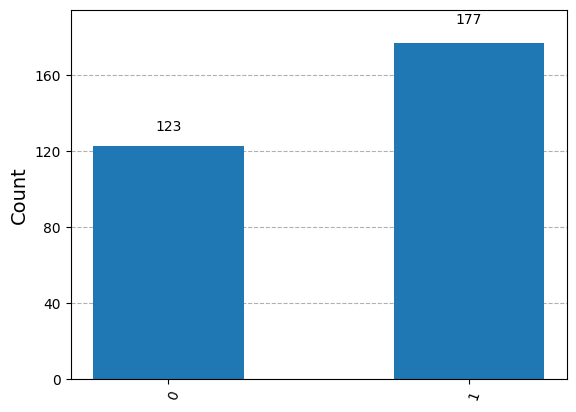

In [62]:
# Simulations and visualization
from qiskit.visualization import plot_histogram
stats = u.sample_counts(300)
plot_histogram(stats)

In [67]:
# Operators
from qiskit.quantum_info import Operator
U = Operator([[3, 3], [33, 3]])
u.evolve(U).draw('latex')

<IPython.core.display.Latex object>

In [78]:
# Quantum circuits
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.x(0)
circuit.draw()

# Evolve doesn't overwrite original u, we need to 
# assign to new variable.
u = u.evolve(circuit)
u.draw('latex')

<IPython.core.display.Latex object>

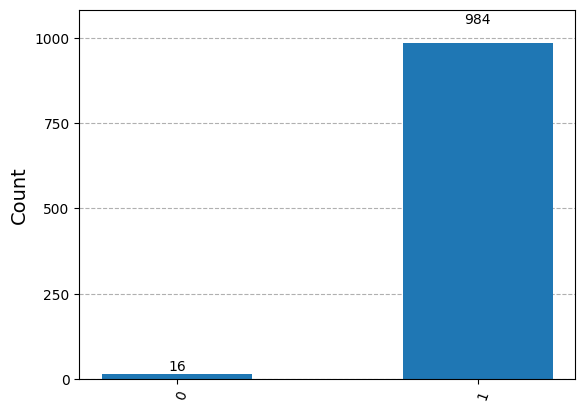

In [79]:
stats = u.sample_counts(1000)
plot_histogram(stats)